### Libraries for dataset manipulation and visulization

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Loading

In [8]:
dataset = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Extracted Features\\Formula_Index_with_EC_value.csv')

### Finding best number of clusters using Elbow Method

In [9]:
X = dataset.iloc[:, [1,2]].values
print(X)

[[5.250e+02 5.400e-01]
 [5.050e+02 5.400e-01]
 [5.420e+02 5.500e-01]
 ...
 [3.970e+02 1.100e+00]
 [2.625e+02 4.500e-01]
 [3.650e+02 4.500e-01]]


C:\Users\Mahmood Yousaf\.conda\envs\gpuEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


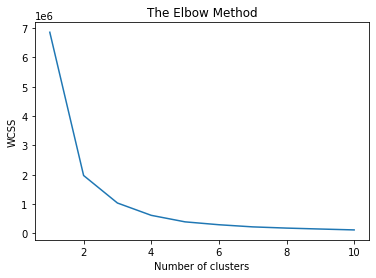

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

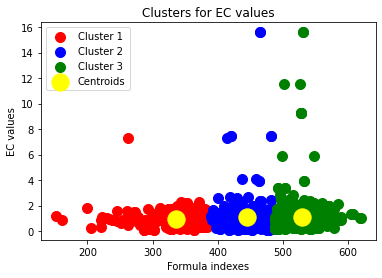

In [12]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters for EC values')
plt.xlabel('Formula indexes')
plt.ylabel('EC values')
plt.savefig("KMeansmodelForECUsingFormula.jpg")
plt.legend()
plt.show()